### Given the annonated dataset, this file will save preprocessed dataset into preprocessed.csv

In [1]:
!pip install scikit-plot
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from bs4 import BeautifulSoup
import re
import os
import pandas as pd
from bs4 import BeautifulSoup
import re
import os
import nltk
from nltk.corpus import indian
nltk.download('indian')
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB as mnb
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import scikitplot as skplt

[nltk_data] Downloading package indian to
[nltk_data]     C:\Users\karan\AppData\Roaming\nltk_data...
[nltk_data]   Package indian is already up-to-date!


In [3]:
#import pandas as pd

#from google.colab import drive
#drive.mount("/content/drive")

In [2]:
data = pd.read_excel('final_new.xlsx')

#print(tweets_csv)

In [5]:
data.shape

(3849, 7)

In [6]:
data_en=data.loc[data['language']=='English']

In [7]:
data_en.shape

(543, 7)

In [9]:
en_words=[]
for i in data_en.data:
    en_words.append(len(str(i)))

In [10]:
import matplotlib.pyplot as plt

def plot_bar_x():
    # this is for plotting purpose
    plt.bar(en_words)
    plt.xlabel('Genre', fontsize=5)
    plt.ylabel('No of Movies', fontsize=5)
    plt.xticks(en_words, fontsize=5, rotation=30)
    plt.title('Market Share for Each Genre 1995-2017')
    plt.show()


In [12]:
data_hindi = data.loc[data['language'] == 'Hindi']

In [13]:
data_hindi.shape

(2927, 7)

In [14]:
data['data'].values[1].split()

['इस',
 'औरत',
 'के',
 'दिमाग',
 'के',
 'आगे',
 'तो',
 'लुटेरे',
 'भी',
 'फैल',
 'हो',
 'गये।']

In [16]:
data_hindi.head()

,favour,against,sentements,data,isPolitical,user,language
1,[],[],"[""Offensive""]",इस औरत के दिमाग के आगे तो लुटेरे भी फैल हो गये।,False,anshuman,Hindi
2,[],[],"[""Offensive""]",Bagaladesi aur ghuspaithi nhi chahiye,True,anshuman,Hindi
3,[],[],"[""Spam"",""Offensive""]",*O. M. G full HD sex*\n \n\n*WATCH LIVE BOOBS*...,False,anshuman,Hindi
4,[],[],[],Democracy ka fayda ap bhi uthao,True,anshuman,Hindi
5,[],[],"[""Others""]",सूत्रों के मुताबिक भारतीय वायुसेना ने पहले करी...,False,anshuman,Hindi


In [17]:
as1 =  data_hindi['sentements'].values

In [0]:
for i in as1:
  print(i[0])
  break
  

[


In [30]:
new_sentiments = []
print (type(as1))

for word in as1:
    if word in '[]':
        new_sentiments.append('Others')
    elif word in '["Others"]':
        new_sentiments.append('Others')
    elif word in '["Offensive"]':
        new_sentiments.append('Offensive')
    elif word in '["Spam"]':
        new_sentiments.append('Spam')
    elif word in '["Advertisement"]':
        new_sentiments.append('Advertisement')
    else:
         new_sentiments.append(((i.split(','))[0])[2:-2])

<class 'numpy.ndarray'>


In [31]:
data_hindi['sentiments']=new_sentiments

In [32]:
data_hindi.head(20)

,favour,against,sentements,data,isPolitical,user,language,sentiments
1,[],[],"[""Offensive""]",इस औरत के दिमाग के आगे तो लुटेरे भी फैल हो गये।,False,anshuman,Hindi,Offensive
2,[],[],"[""Offensive""]",Bagaladesi aur ghuspaithi nhi chahiye,True,anshuman,Hindi,Offensive
3,[],[],"[""Spam"",""Offensive""]",*O. M. G full HD sex*\n \n\n*WATCH LIVE BOOBS*...,False,anshuman,Hindi,not sent
4,[],[],[],Democracy ka fayda ap bhi uthao,True,anshuman,Hindi,Others
5,[],[],"[""Others""]",सूत्रों के मुताबिक भारतीय वायुसेना ने पहले करी...,False,anshuman,Hindi,Others
6,[],[],"[""Offensive""]",कहाँ से इनको पकड़ा है भाई तुम लोगो ने,False,anshuman,Hindi,Offensive
7,[],[],"[""Offensive""]",Teri oukat nhi h be,False,anshuman,Hindi,Offensive
8,[],[],"[""Others""]","पुलवामा: झड़प में 8 पत्थरबाजों की मौत, 9 की हा...",True,anshuman,Hindi,Others
11,"[""INC""]",[],[],कांग्रेस मे ऐसे महिलाओं को न्याय सम्मान और सुर...,True,anup,Hindi,Others
13,"[""BJP""]",[],[],तुम जल जल के मर जाओगे\nजलजला हम रुकने न देगे\n...,True,anup,Hindi,Others


### EDA

In [23]:
df = data.groupby(['language']).nunique()

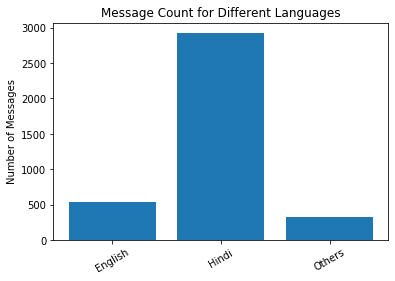

In [24]:
import numpy as np
import matplotlib.pyplot as plt
label = ['English','Hindi','Others']
index = np.arange(len(label))
plt.bar(index, df['data'].values)
plt.ylabel('Number of Messages', fontsize=10)
plt.xticks(index, label, fontsize=10, rotation=30)
plt.title('Message Count for Different Languages')
plt.show()

In [25]:
df = data_hindi.groupby(['sentiments']).nunique()

In [26]:
df

,favour,against,sentements,data,isPolitical,user,language,sentiments
sentiments,,,,,,,,
not sent,5,8,6,754,2,8,1,1
Advertisement,3,3,1,63,2,8,1,1
Offensive,3,10,1,174,2,8,1,1
Others,13,30,1,1479,2,8,1,1
Spam,4,3,1,457,2,8,1,1


In [ ]:
label = ['English','Hindi','Others']
index = np.arange(len(label))
plt.bar(index, df['data'].values)
plt.ylabel('Number of Messages', fontsize=10)
plt.xticks(index, label, fontsize=10, rotation=30)
plt.title('Message Count for Different Languages')
plt.show()

### 

## Sreejith please convert all the below given keywords in the string form like given in example (red words)

In [0]:
stopwords =set(['अत','अपना','अपनी','अपने','अभी','अंदर','आदि','आप','इस'])

In [0]:
v = data_hindi['data'].values[20]

In [0]:
v

'जल कर रहेगी भाजपा की लंका \nपूरे देश में बजेगा अखिलेश यादव जी का डंका\n'

In [0]:
re.sub('[^0-9]+', ' ', v)

' '

In [0]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_reviews = []
# tqdm is for printing the status bar
for sentance in tqdm(data_hindi['data'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    #sentance = decontracted(sentance)
    sentance = re.sub("\n*", "", sentance).strip()
    #sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    #sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_reviews.append(sentance.strip())

100%|██████████| 2927/2927 [00:00<00:00, 4240.44it/s]


In [0]:
preprocessed_reviews

['इस औरत के दिमाग के आगे तो  लुटेरे भी फैल हो गये।',
 'Bagaladesi aur ghuspaithi nhi chahiye',
 '*O. M. G full HD sex* *WATCH LIVE BOOBS**कमरे के बाहर कीया सेक्स देखिए वीडियो**Girlfriend hot videos**FADU \xa0SEXxx**AWESOME FUCK*',
 'Democracy ka fayda ap bhi uthao',
 'सूत्रों के मुताबिक भारतीय वायुसेना ने पहले करीब 5 किलो टमाटर फेंके और जैसे ही कंगले बाहर टमाटर लूटने निकले, बम मार दिए.',
 'कहाँ से इनको पकड़ा है भाई तुम लोगो ने',
 'Teri oukat nhi h be',
 'पुलवामा: झड़प में 8 पत्थरबाजों की मौत, 9 की हालत गंभीर, 50 से ज्यादा घायल, 3 आतंकी भी ढेरSource : "Tech Duniya" via Dailyhuntडाउनलोड करें:',
 'कांग्रेस मे ऐसे महिलाओं को न्याय सम्मान और सुरक्षा मिलेगी',
 'तुम जल जल के मर जाओगेजलजला हम रुकने न देगेमोदी देश नही झुकने देगाहम #मोदी को नही झुकने देगे #NamoAgain2019',
 'इस लिए टारगेट हिसाब से लेना चाहिए।',
 '*आगे तो ईंट घिसते ही थे,**अब पीछे पत्थर घिसने की आदत भी डाल लो मियां...**#पानी_बंद*',
 'Ache se ghum sakti thi',
 'जय श्री रामरामनवमी के पावन पर्व पर आप सभी को बहुत बहुत बधाई।मा दुर्गा भव

In [0]:
nltk.download('punkt')
tokenized = []
for line in preprocessed_reviews:
    x = nltk.tokenize.word_tokenize(line)
    tokenized.append(x)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Removing all the special characters

In [0]:
bad_chars = [';', ':', '!', "*",',','#','``','...','..','.','**','?','(',')','@','$','&','।','%','}','{','[',']',';']
clean_text = []
for line in tokenized:
    text = ""
    for word in line:
        if word not in bad_chars:
            text = text+" "+word
    clean_text.append(text)

In [0]:
tokenized = []
for line in clean_text:
    x = nltk.tokenize.word_tokenize(line)
    tokenized.append(x)

## Removing all the special character from in between the word

In [0]:
clean_text = []
for line in tokenized:
    text = ""
    for word in line:
        for i in bad_chars: 
            word = word.replace(i, '')
        text = text+' '+word
    clean_text.append(text)

### removing whitespaces from every sentence

In [0]:
final_text = []
for line in clean_text:
    final_text.append(line.strip()) 

### Removing all the words of single length

In [0]:
clean_text = []
for line in final_text:
    text = ''
    for word in line.split():
        if len(word)>1:
            text = text+' '+word
    clean_text.append(text)
            

In [0]:
clean_text

[' इस औरत के दिमाग के आगे तो लुटेरे भी फैल हो गये',
 ' Bagaladesi aur ghuspaithi nhi chahiye',
 ' full HD sex WATCH LIVE BOOBSकमरे के बाहर कीया सेक्स देखिए वीडियोGirlfriend hot videosFADU SEXxxAWESOME FUCK',
 ' Democracy ka fayda ap bhi uthao',
 ' सूत्रों के मुताबिक भारतीय वायुसेना ने पहले करीब किलो टमाटर फेंके और जैसे ही कंगले बाहर टमाटर लूटने निकले बम मार दिए',
 ' कहाँ से इनको पकड़ा है भाई तुम लोगो ने',
 ' Teri oukat nhi be',
 " पुलवामा झड़प में पत्थरबाजों की मौत की हालत गंभीर 50 से ज्यादा घायल आतंकी भी ढेरSource Tech Duniya '' via Dailyhuntडाउनलोड करें",
 ' कांग्रेस मे ऐसे महिलाओं को न्याय सम्मान और सुरक्षा मिलेगी',
 ' तुम जल जल के मर जाओगेजलजला हम रुकने देगेमोदी देश नही झुकने देगाहम मोदी को नही झुकने देगे NamoAgain2019',
 ' इस लिए टारगेट हिसाब से लेना चाहिए',
 ' आगे तो ईंट घिसते ही थे अब पीछे पत्थर घिसने की आदत भी डाल लो मियां पानी_बंद',
 ' Ache se ghum sakti thi',
 ' जय श्री रामरामनवमी के पावन पर्व पर आप सभी को बहुत बहुत बधाईमा दुर्गा भवानी आप सभी की मनोकामना पूर्ण करे',
 ' इतिहासर

## Removing all the hinglish words from the text

In [0]:
text_data = []
for line in clean_text:
    v = ''
    for word in line.split():
        if (ord(word[0])>=65 and ord(word[0])<=90) or (ord(word[-1])>=97 and ord(word[-1])<=122):
            continue
        else:
            v = v+' '+word
    text_data.append(v)

In [0]:
print("DataSet after removing all the hinglish sentences from the dataset:")
print("=="*30)
text_data[0:10]

DataSet after removing all the hinglish sentences from the dataset:


[' इस औरत के दिमाग के आगे तो लुटेरे भी फैल हो गये',
 '',
 ' के बाहर कीया सेक्स देखिए videosFADU',
 '',
 ' सूत्रों के मुताबिक भारतीय वायुसेना ने पहले करीब किलो टमाटर फेंके और जैसे ही कंगले बाहर टमाटर लूटने निकले बम मार दिए',
 ' कहाँ से इनको पकड़ा है भाई तुम लोगो ने',
 '',
 " पुलवामा झड़प में पत्थरबाजों की मौत की हालत गंभीर 50 से ज्यादा घायल आतंकी भी '' करें",
 ' कांग्रेस मे ऐसे महिलाओं को न्याय सम्मान और सुरक्षा मिलेगी',
 ' तुम जल जल के मर जाओगेजलजला हम रुकने देगेमोदी देश नही झुकने देगाहम मोदी को नही झुकने देगे']

In [0]:
final_text = []
for line in text_data:
    final_text.append(line.strip()) 

### Stroing all the cleaned text into the file

In [0]:
data_hindi['Hindi'] = final_text

In [0]:
data_hindi.head()

,favour,against,sentements,data,isPolitical,user,language,sentiments,Hindi
1,[],[],"[""Offensive""]",इस औरत के दिमाग के आगे तो लुटेरे भी फैल हो गये।,False,anshuman,Hindi,Offensive,इस औरत के दिमाग के आगे तो लुटेरे भी फैल हो गये
2,[],[],"[""Offensive""]",Bagaladesi aur ghuspaithi nhi chahiye,True,anshuman,Hindi,Offensive,
3,[],[],"[""Spam"",""Offensive""]",*O. M. G full HD sex*\n \n\n*WATCH LIVE BOOBS*...,False,anshuman,Hindi,Offensive,के बाहर कीया सेक्स देखिए videosFADU
4,[],[],[],Democracy ka fayda ap bhi uthao,True,anshuman,Hindi,Others,
5,[],[],"[""Others""]",सूत्रों के मुताबिक भारतीय वायुसेना ने पहले करी...,False,anshuman,Hindi,Offensive,सूत्रों के मुताबिक भारतीय वायुसेना ने पहले करी...


### Preparing the dataset for modeling

In [0]:
print("Total Size of the Dataset: ",data_hindi.shape)

Total Size of the Dataset:  (2927, 9)


In [0]:
df = data_hindi[data_hindi['Hindi']!=''] 

In [0]:
print("Number of rows with hindi sentences in the dataset :",df.shape[0])

Number of rows with hindi sentences in the dataset : 2337


In [0]:
y_val = df['isPolitical'].values

In [0]:
y = []
for val in y_val:
    if val:
        y.append(1)
    else:
        y.append(0)

In [0]:
df['Political'] = y

In [0]:
print("Number of Non Political Messages : ",df[df['Political']==0].shape)
print("Number of Political Messages : ",df[df['Political']==1].shape)

Number of Non Political Messages :  (928, 10)
Number of Political Messages :  (1409, 10)


In [0]:
df.head()

,favour,against,sentements,data,isPolitical,user,language,sentiments,Hindi,Political
1,[],[],"[""Offensive""]",इस औरत के दिमाग के आगे तो लुटेरे भी फैल हो गये।,False,anshuman,Hindi,Offensive,इस औरत के दिमाग के आगे तो लुटेरे भी फैल हो गये,0
3,[],[],"[""Spam"",""Offensive""]",*O. M. G full HD sex*\n \n\n*WATCH LIVE BOOBS*...,False,anshuman,Hindi,Offensive,के बाहर कीया सेक्स देखिए videosFADU,0
5,[],[],"[""Others""]",सूत्रों के मुताबिक भारतीय वायुसेना ने पहले करी...,False,anshuman,Hindi,Offensive,सूत्रों के मुताबिक भारतीय वायुसेना ने पहले करी...,0
6,[],[],"[""Offensive""]",कहाँ से इनको पकड़ा है भाई तुम लोगो ने,False,anshuman,Hindi,Offensive,कहाँ से इनको पकड़ा है भाई तुम लोगो ने,0
8,[],[],"[""Others""]","पुलवामा: झड़प में 8 पत्थरबाजों की मौत, 9 की हा...",True,anshuman,Hindi,Offensive,पुलवामा झड़प में पत्थरबाजों की मौत की हालत गंभ...,1


In [0]:
## Saving the dataset in the system
df.to_csv('drive/My Drive/Colab Notebooks/preprocessed.csv')

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df['Hindi'], df['sentiments'], test_size=0.20, random_state=42)

In [0]:
print("Number of data points in train set :",X_train.shape[0])
print("Number of data points in test set",X_test.shape[0])

Number of data points in train set : 1869
Number of data points in test set 468
